In [1]:
%pylab inline
from scipy import *
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Define function taking two trajectories
def f(x,mu):
    return 4*mu*x*(1-x)

The lyapunov exponent is approximately 0.205


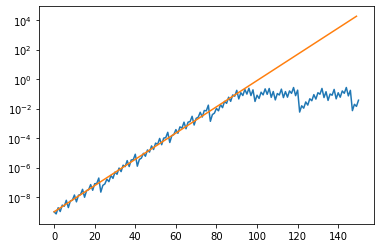

In [20]:
#Parameters
mu = 0.9
epsilon = 1e-9

#Create our two initial points on the trajectory
x0 = 0.6
y0 = x0 + epsilon
xarray = [x0]
yarray = [y0]

#Fill two arrays of the two paths, for f(x0), f(f(x0)), ... f(y0), f(f(y0)), etc...
#k goes up to 120 before we see levelling out
for k in range(150):
    x = f(xarray[k],mu) #uses previous value for subsequent input in x
    xarray.append(x)
    y = f(yarray[k],mu) #repeat in y
    yarray.append(y)

#Save into arrays to create new array of differences for path separation
xarray = np.array(xarray)
yarray = np.array(yarray)
path_separation = xarray - yarray

#Make logarithmic in y
semilogy(abs(path_separation))

#Set a guess for lyapunov exponent and change until it fits to data
Lambda = .205
t = np.arange(150)
y2 = epsilon*np.e**(Lambda*t)
semilogy(t, y2)
print('The lyapunov exponent is approximately', Lambda)